# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.5'

## Specifying filetype, and folder as before

In [37]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [38]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Std' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')
if batch=='Std':
    GroupN_df=joblib.load('Std_df.sav')

GroupN_df

filename  rays_present  approx_split  \
0            04 FG04-A1-4-start_r1.txt           0.0    104.539543   
1            05 FG04-A1-4-start_r2.txt           0.0    104.583536   
2            06 FG04-A1-4-start_r3.txt           0.0    104.556040   
3              50 FG04-A1-4-end_r4.txt           0.0    104.567039   
4              51 FG04-A1-4-end_r5.txt           0.0    104.616531   
5  52 FG04-A1-4-end_r6_CRR_DiadFit.txt           1.0    104.605533   

     Diad1_pos    Diad2_pos  HB1_pos      HB2_pos  C13_pos  Diad1_abs_prom  \
0  1282.866136  1387.405679      NaN  1408.704029      NaN      435.582920   
1  1282.772650  1387.356186      NaN  1408.627041      NaN      477.572882   
2  1282.844139  1387.400179      NaN  1408.951493      NaN      473.110974   
3  1282.805645  1387.372684      NaN  1409.083473      NaN      561.261015   
4  1282.761651  1387.378183      NaN  1409.198956      NaN      605.198738   
5  1282.739655  1387.345188      NaN  1408.726026      NaN      667.874920   

   Diad2_abs_prom  ...  HB2_height  C13_height  Diad1_height  HB1_height  \
0      876.309686  ...  744.288503         NaN   1137.482914         NaN   
1      929.333849  ...  732.612104         NaN   1166.172888         NaN   
2      923.919922  ...  725.597679         NaN   1157.310986         NaN   
3     1141.213520  ...  741.778666         NaN   1251.960997         NaN   
4     1217.606753  ...  748.601638         NaN   1301.798744         NaN   
5     1351.430963  ...  751.807616         NaN   1359.274914         NaN   

   Diad1_Median_Bck  Diad2_Median_Bck  C13_HB2_abs_prom_ratio  \
0        701.899994        702.199982                     NaN   
1        688.600006        688.500000                     NaN   
2        684.200012        684.200012                     NaN   
3        690.699982        691.000000                     NaN   
4        696.600006        696.849991                     NaN   
5        691.399994        691.349991                     NaN   

   Diad2_HB2_Valley_prom  HB1_prom/std_betweendiads  HB2_prom/std_betweendiads  
0               1.003986                        NaN                  22.148327  
1               1.011350                        NaN                  25.935054  
2               1.011414                        NaN                  21.873304  
3               1.012149                        NaN                  26.624671  
4               1.008317                        NaN                  28.256005  
5               1.011884                        NaN                  43.667593  

[6 rows x 40 columns]

### Now load one file from this group to tweak parameters for

In [39]:
Diad_Files =GroupN_df['filename']
i=4


### Lets plot the diad to have a look at it

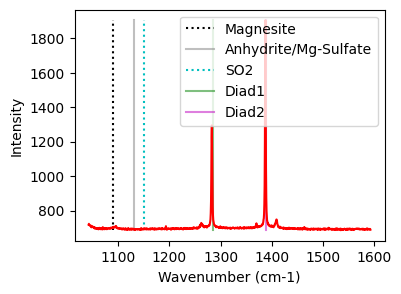

In [40]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [41]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [42]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

# FG04 Standards
if batch=='Std':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init


if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240), upper_bck_diad1=(1315, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=605.1987377468936, HB_prom=nan, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

/opt/anaconda3/envs/py3124/lib/python3.12/site-packages/DiadFit/diads.py:2554: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0).infer_objects()


Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0           1282.85715        1282.85715         0.00816       1261.684597   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  Diad1_Combofit_Height  \
0           0.998158                  0             435.999065   

   Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  \
0         4.02697        0.824168    1.996315  Flagged Warnings:   

   Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0      1.032479      1.007092                   0.064838   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0              0.004579  PseudoVoigtModel

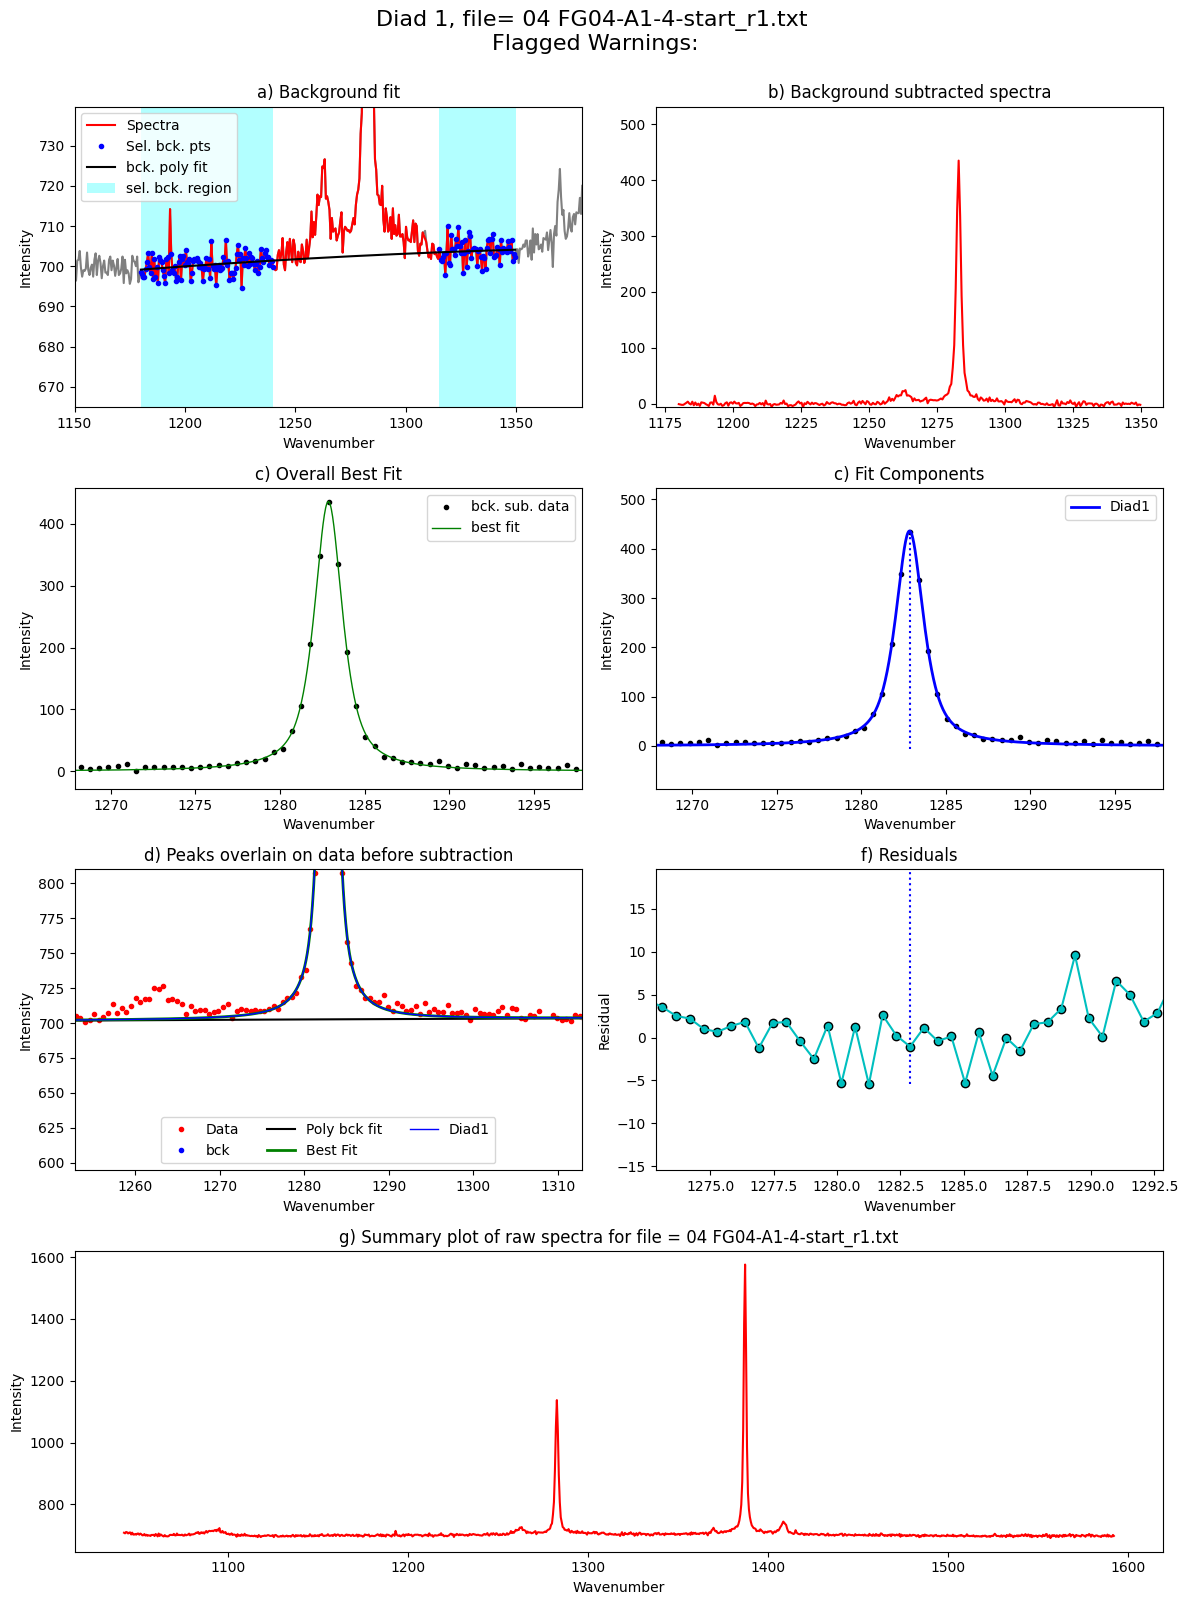

In [43]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [44]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [45]:
if batch=='Std':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init


if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=False, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=True, gauss_amp=107.40328774703653, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=1217.6067533948049, HB_prom=53.701643873518265, C13_prom=nan, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

/opt/anaconda3/envs/py3124/lib/python3.12/site-packages/DiadFit/diads.py:2554: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0).infer_objects()


Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1387.340612       1387.340662         0.00189       2777.686471   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma     HB2_Cent    HB2_Area  HB2_Sigma  \
0           0.803513                  0  1408.779236  309.676268   1.994979   

   Diad2_Combofit_Height  ...  Diad2_fwhm  Diad2_Gauss_Cent  Diad2_Gauss_Area  \
0            1226.331334  ...    1.607026        1380.95745        228.510957   

   Diad2_Gauss_Sigma        Diad2_refit  Diad2_Asym50 Diad2_Asym70  \
0          14.733002  Flagged Warnings:      1.106987     1.096478   

   Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0                   0.171931               0.00131  PseudoVoigtModel  

[1 rows x 22 columns]

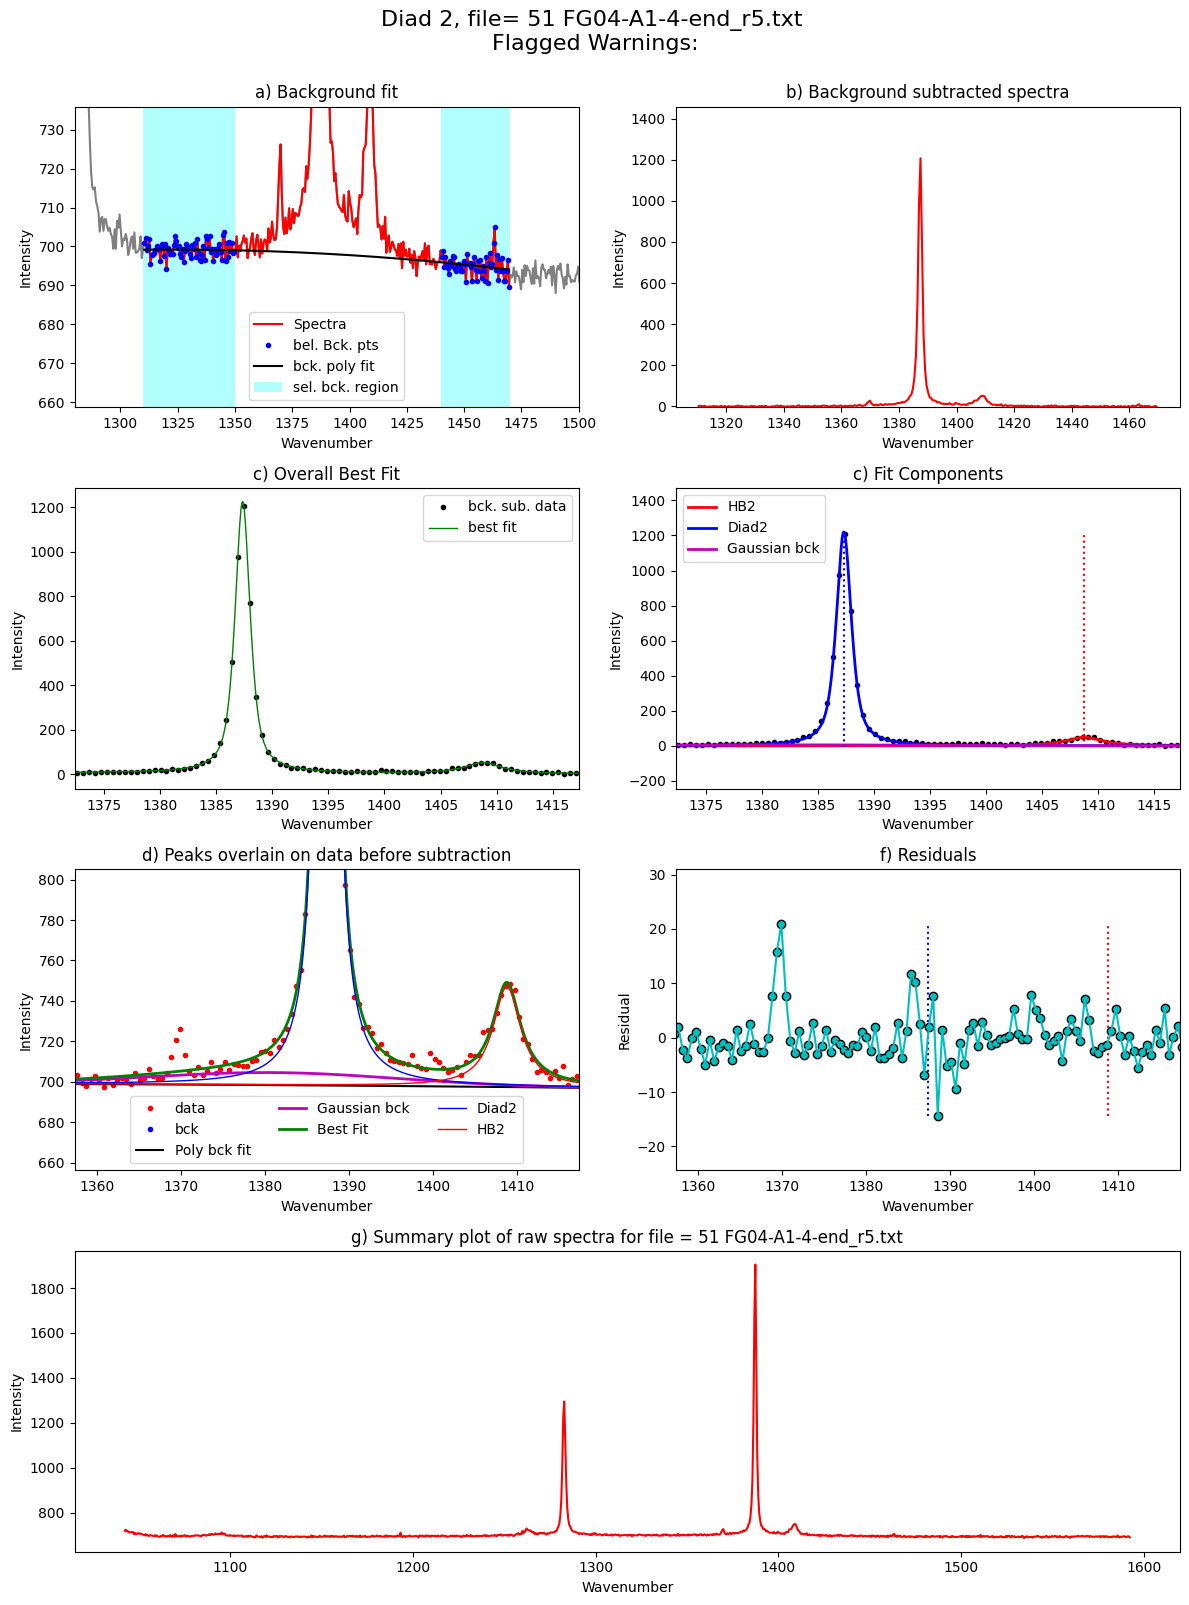

In [46]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/6 [00:00<?, ?it/s]/opt/anaconda3/envs/py3124/lib/python3.12/site-packages/DiadFit/diads.py:2554: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0).infer_objects()


Processing file: 04 FG04-A1-4-start_r1.txt


/opt/anaconda3/envs/py3124/lib/python3.12/site-packages/DiadFit/diads.py:2554: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0).infer_objects()
 17%|█▋        | 1/6 [00:01<00:06,  1.36s/it]/opt/anaconda3/envs/py3124/lib/python3.12/site-packages/DiadFit/diads.py:2554: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0).infer_objects()


Processing file: 05 FG04-A1-4-start_r2.txt


/opt/anaconda3/envs/py3124/lib/python3.12/site-packages/DiadFit/diads.py:2554: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0).infer_objects()
 33%|███▎      | 2/6 [00:02<00:05,  1.39s/it]/opt/anaconda3/envs/py3124/lib/python3.12/site-packages/DiadFit/diads.py:2554: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0).infer_objects()


Processing file: 06 FG04-A1-4-start_r3.txt


/opt/anaconda3/envs/py3124/lib/python3.12/site-packages/DiadFit/diads.py:2554: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0).infer_objects()
 50%|█████     | 3/6 [00:04<00:04,  1.37s/it]/opt/anaconda3/envs/py3124/lib/python3.12/site-packages/DiadFit/diads.py:2554: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0).infer_objects()


Processing file: 50 FG04-A1-4-end_r4.txt


/opt/anaconda3/envs/py3124/lib/python3.12/site-packages/DiadFit/diads.py:2554: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0).infer_objects()
 67%|██████▋   | 4/6 [00:05<00:02,  1.39s/it]/opt/anaconda3/envs/py3124/lib/python3.12/site-packages/DiadFit/diads.py:2554: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0).infer_objects()


Processing file: 51 FG04-A1-4-end_r5.txt


/opt/anaconda3/envs/py3124/lib/python3.12/site-packages/DiadFit/diads.py:2554: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0).infer_objects()
 83%|████████▎ | 5/6 [00:06<00:01,  1.36s/it]/opt/anaconda3/envs/py3124/lib/python3.12/site-packages/DiadFit/diads.py:2554: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0).infer_objects()


Processing file: 52 FG04-A1-4-end_r6_CRR_DiadFit.txt


/opt/anaconda3/envs/py3124/lib/python3.12/site-packages/DiadFit/diads.py:2554: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0).infer_objects()
100%|██████████| 6/6 [00:08<00:00,  1.36s/it]


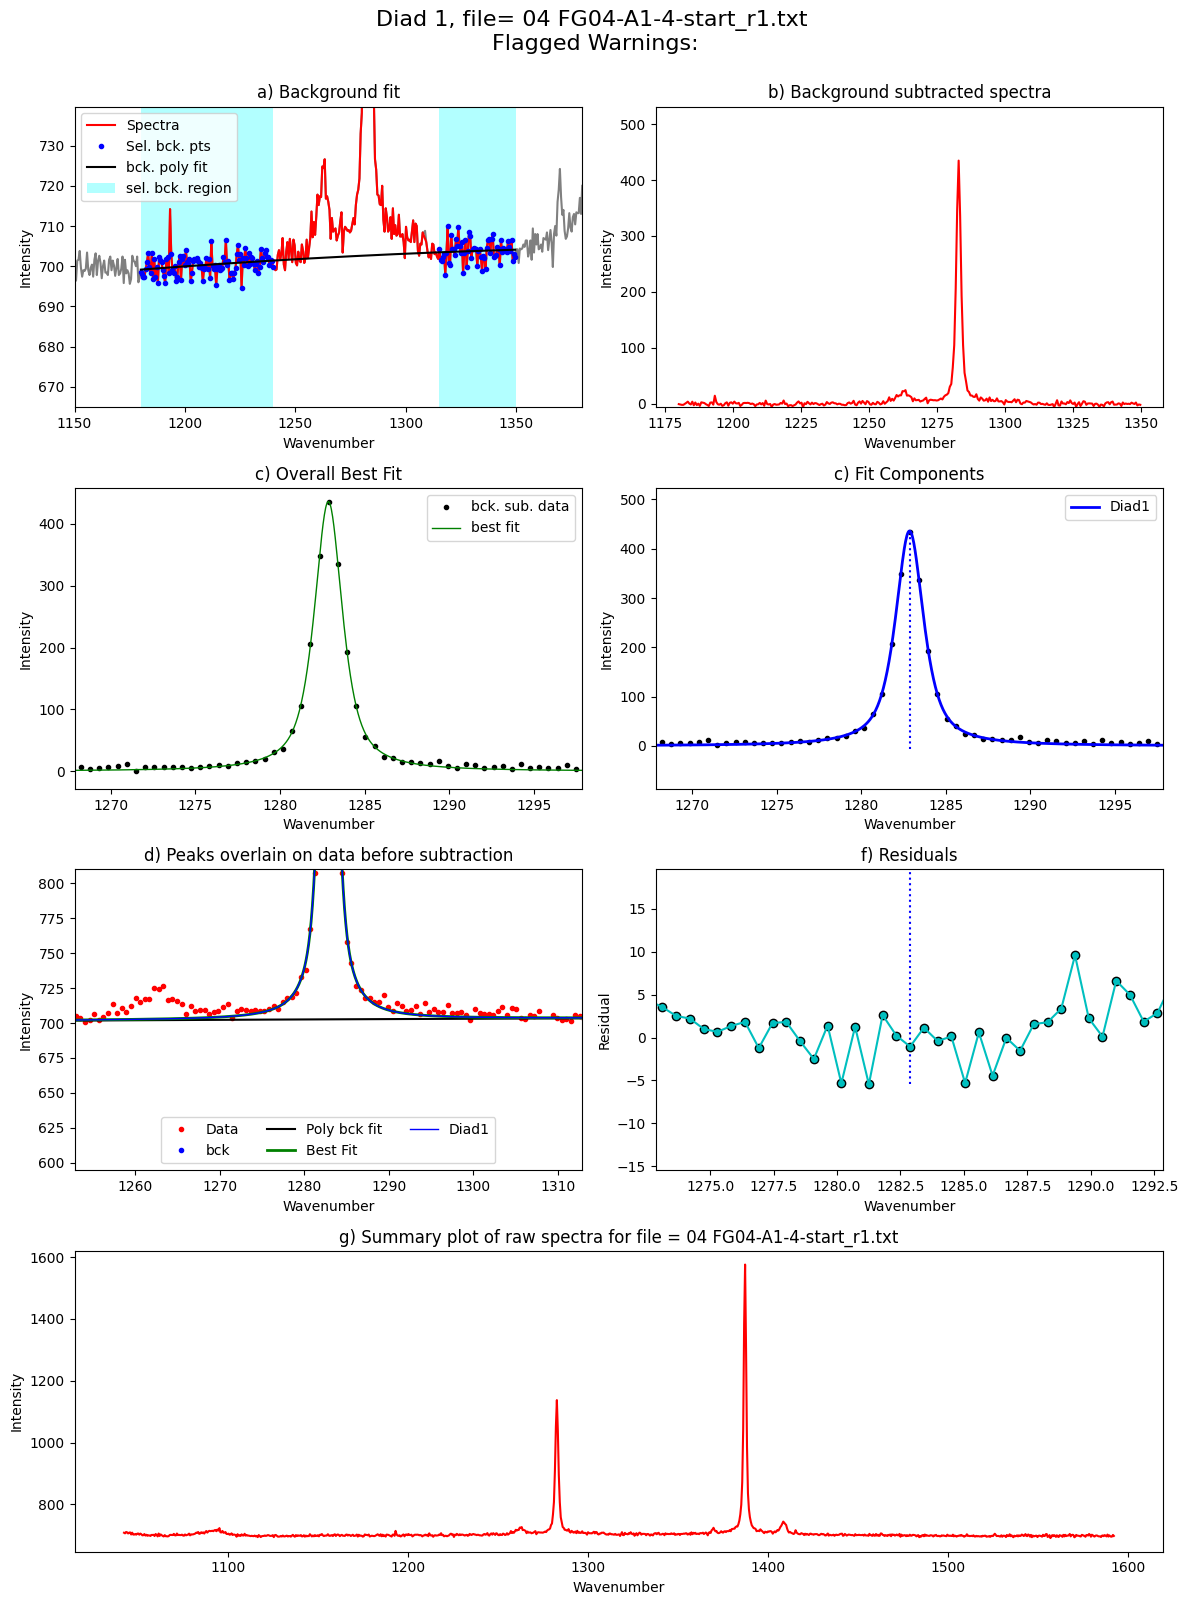

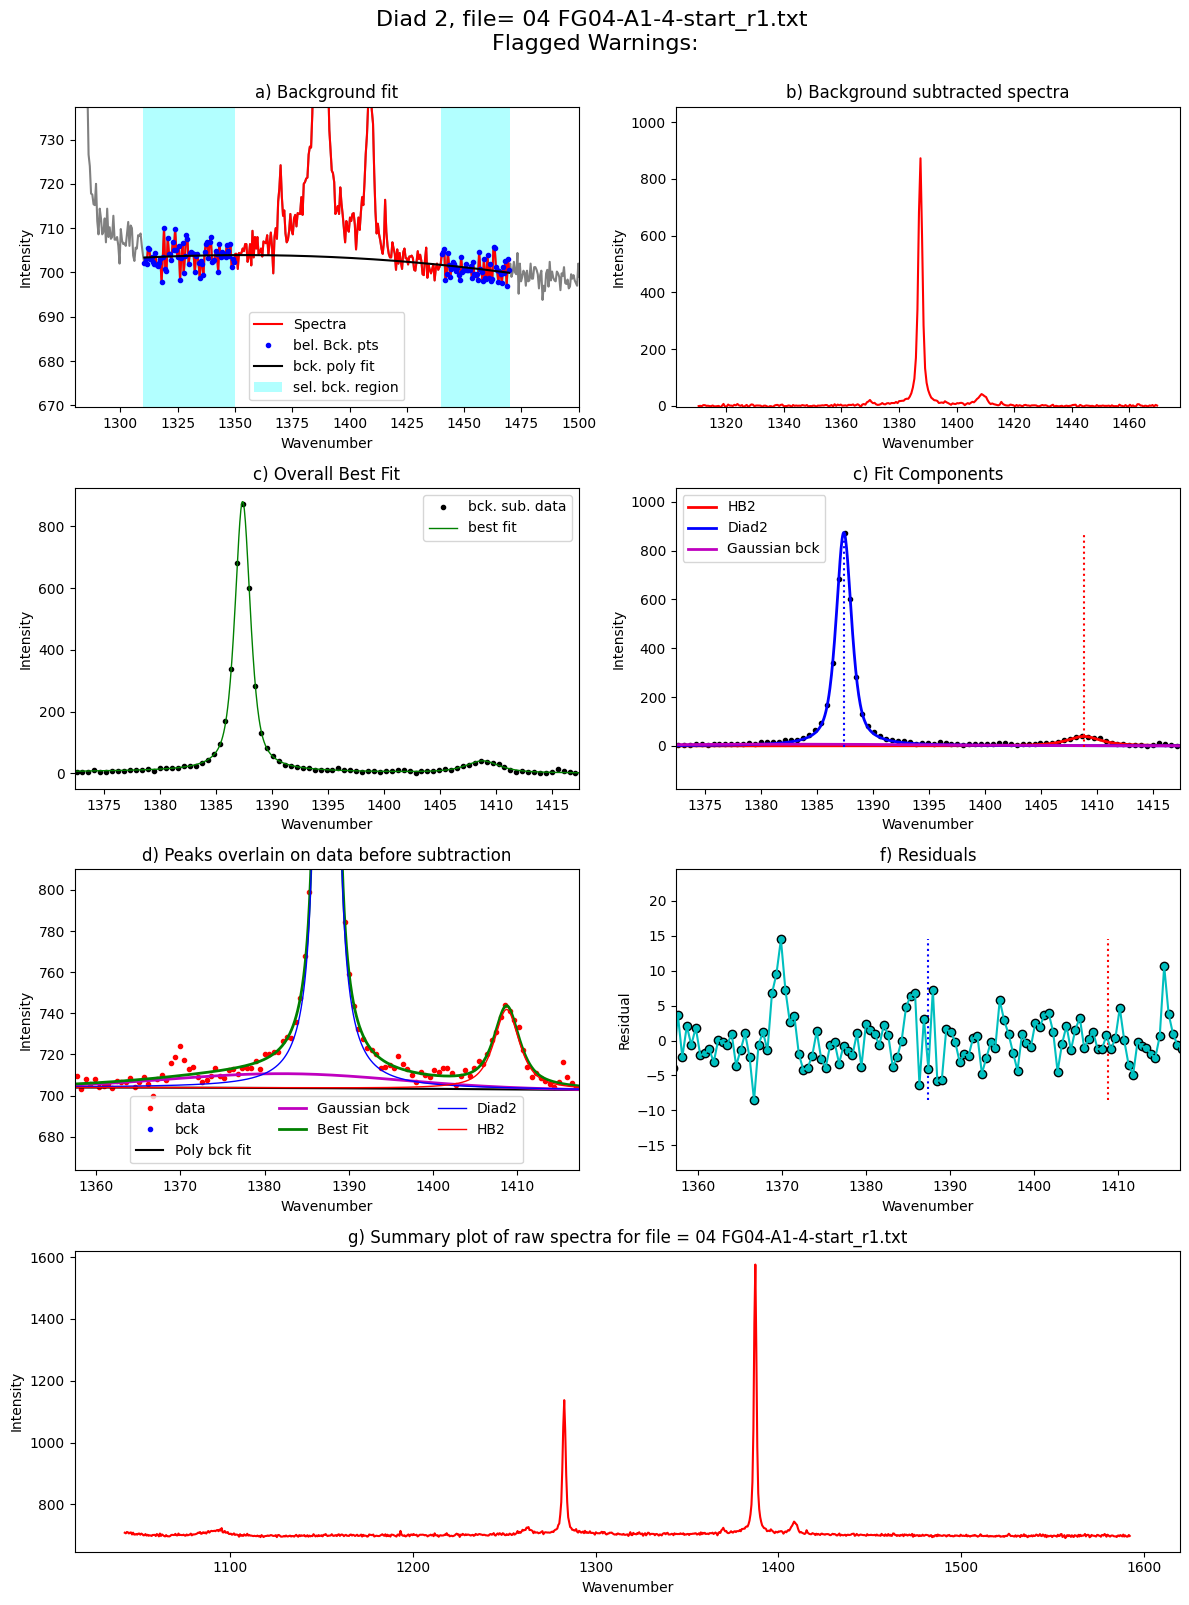

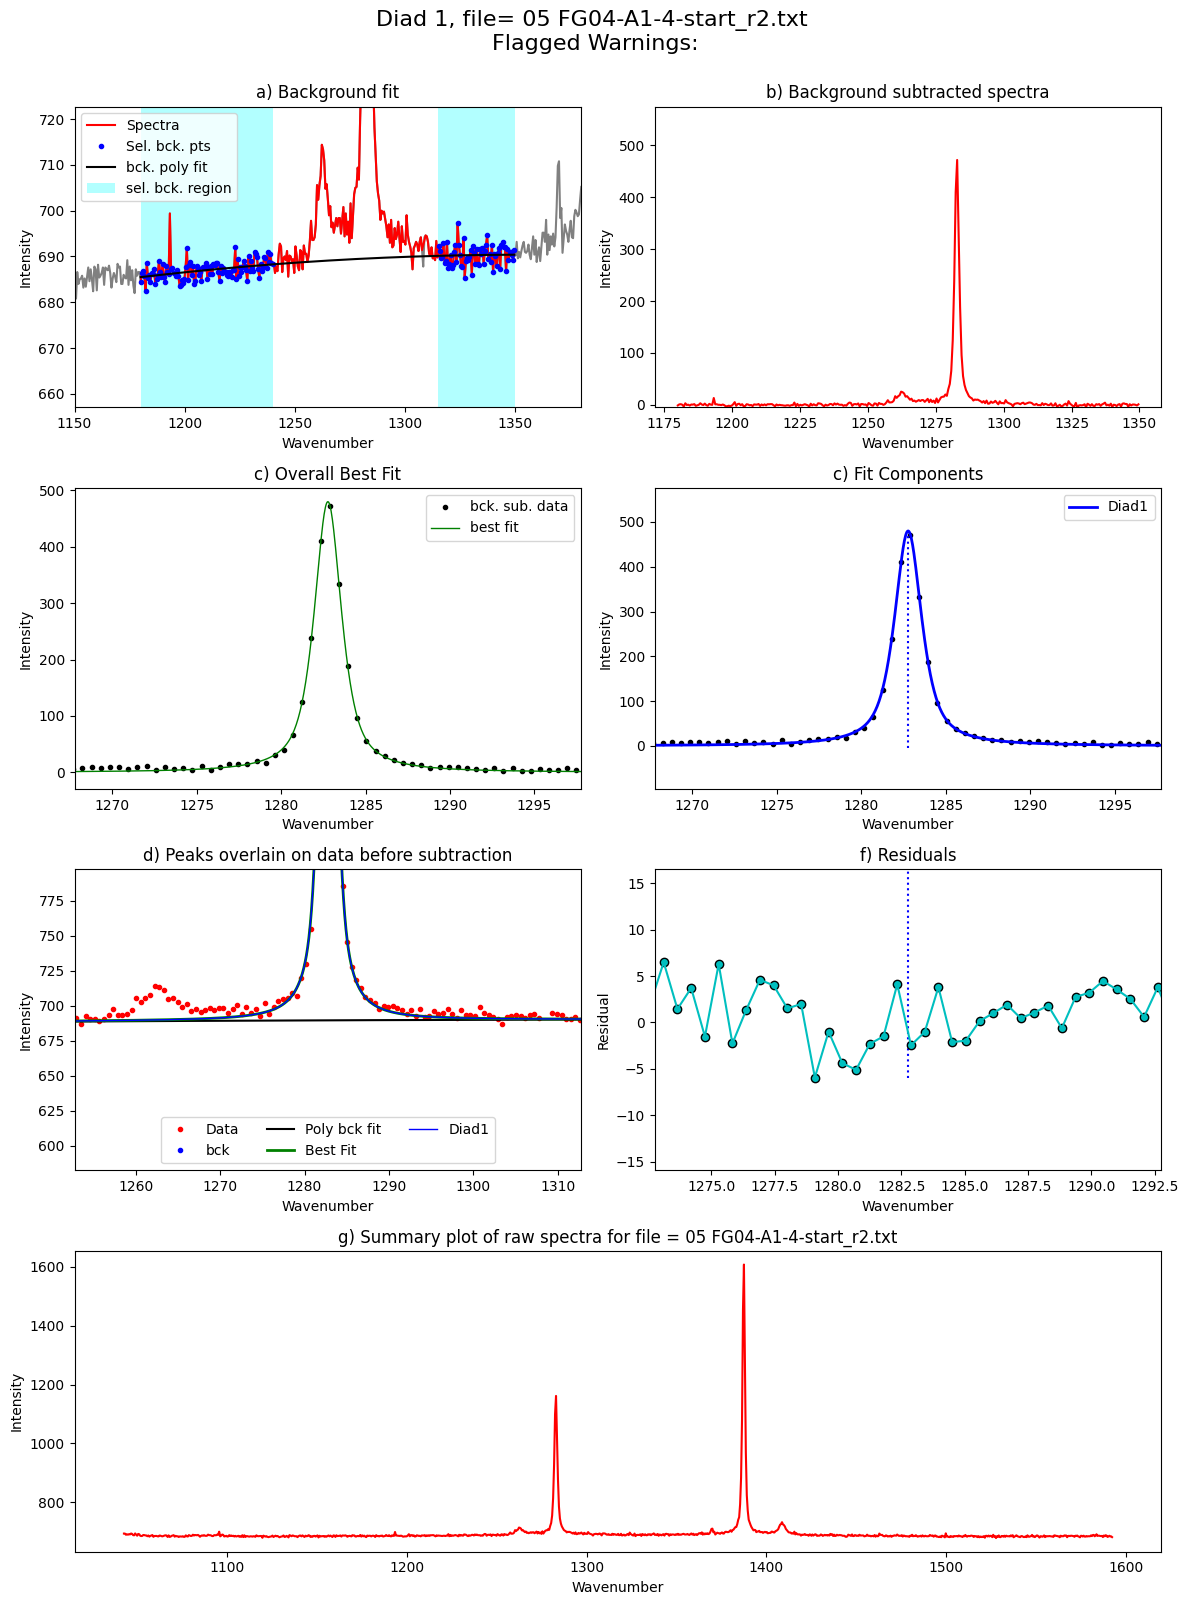

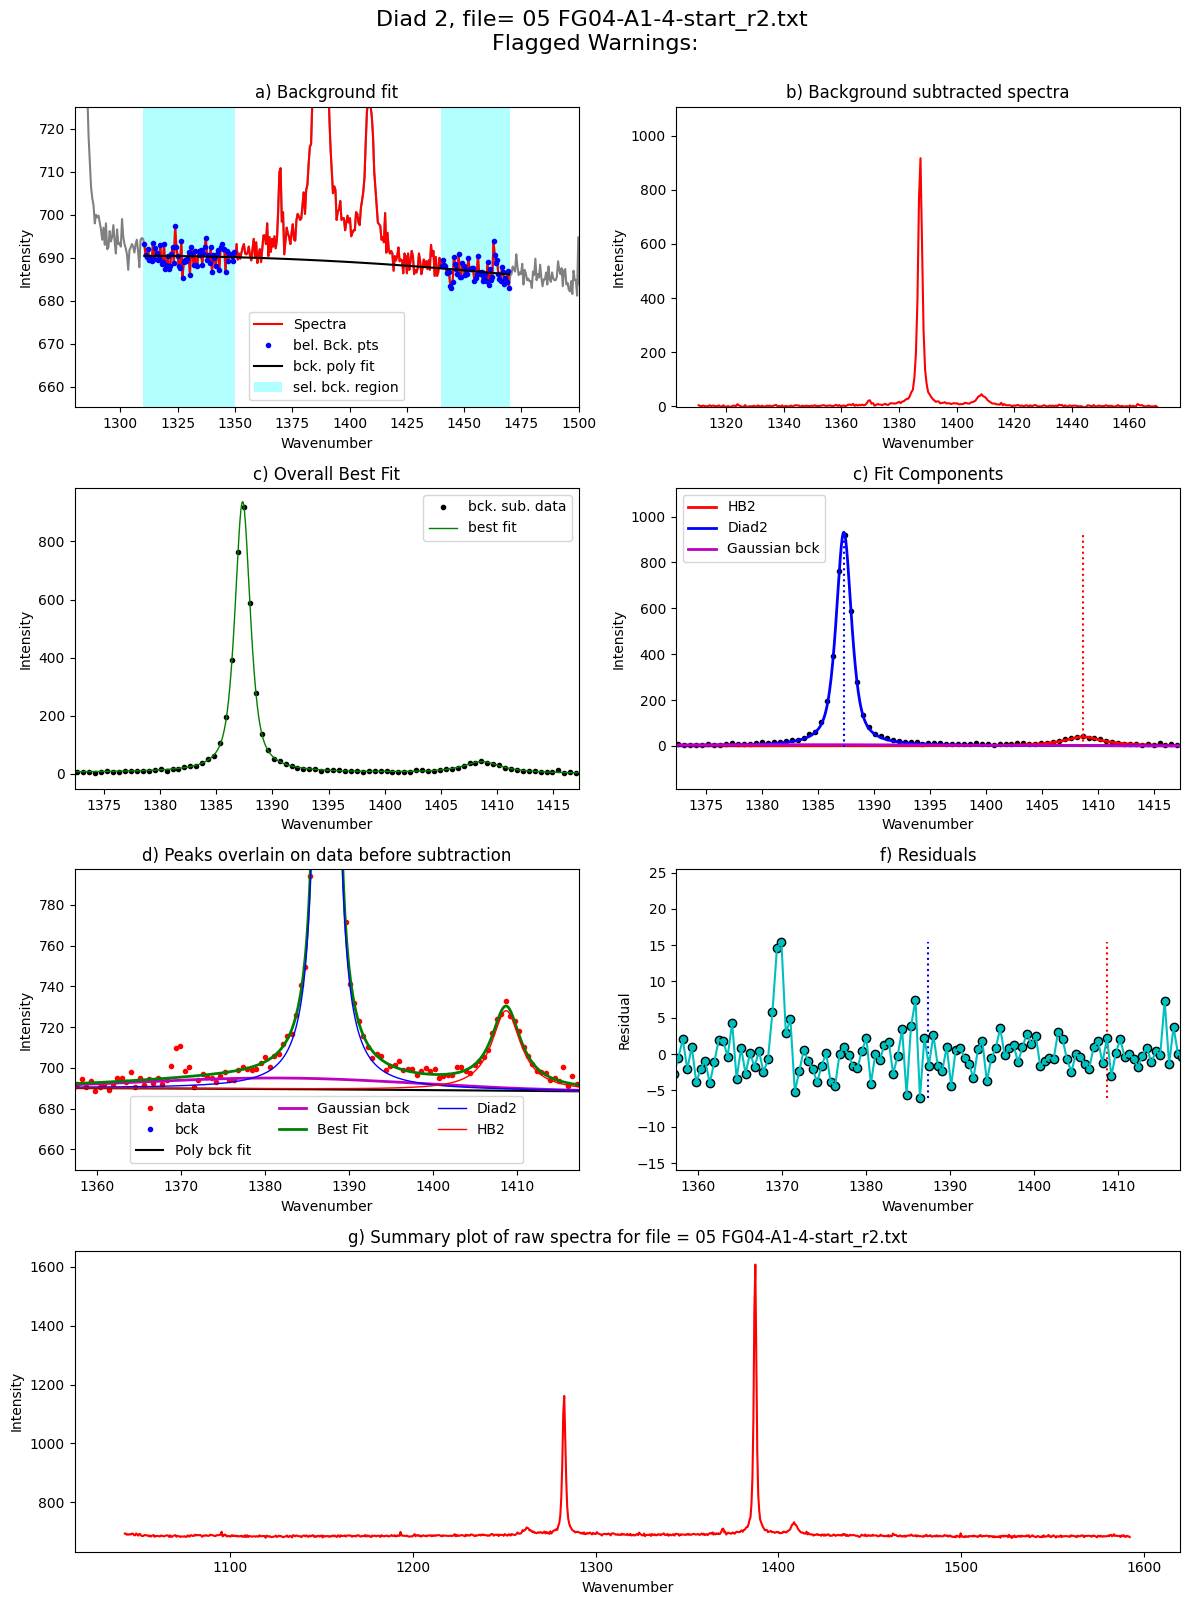

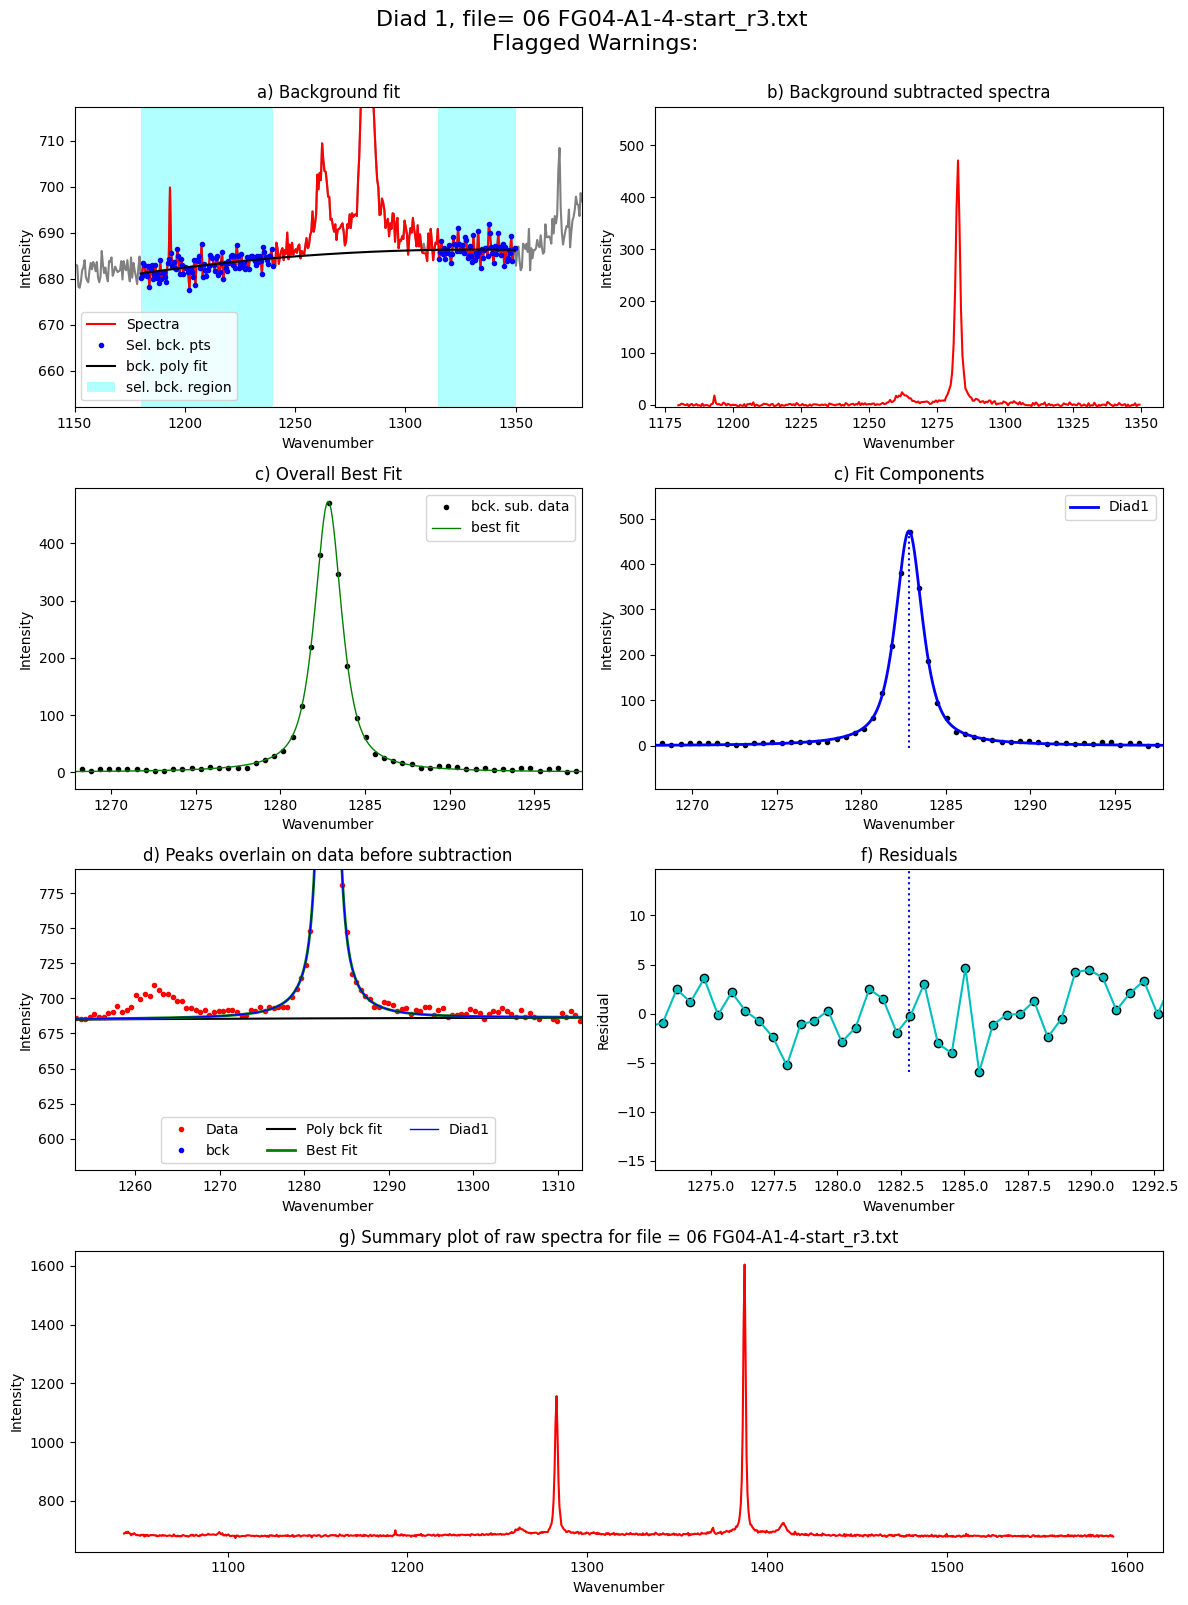

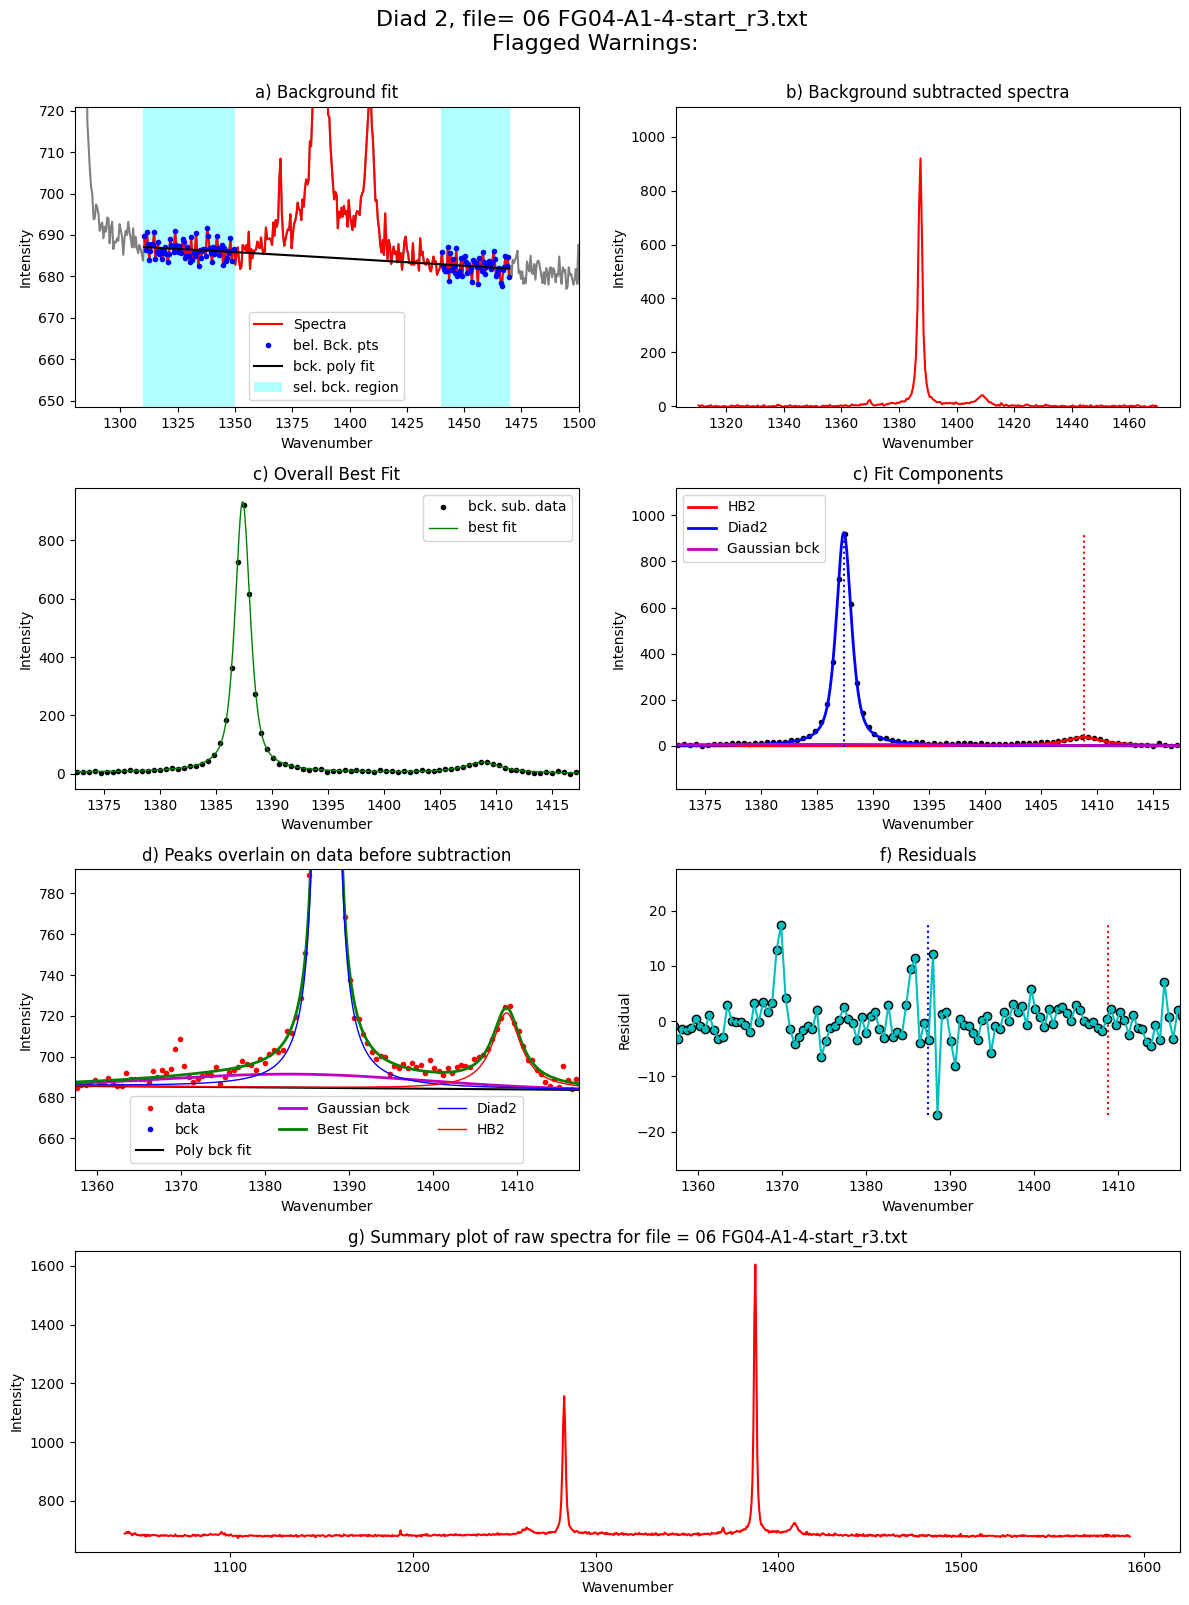

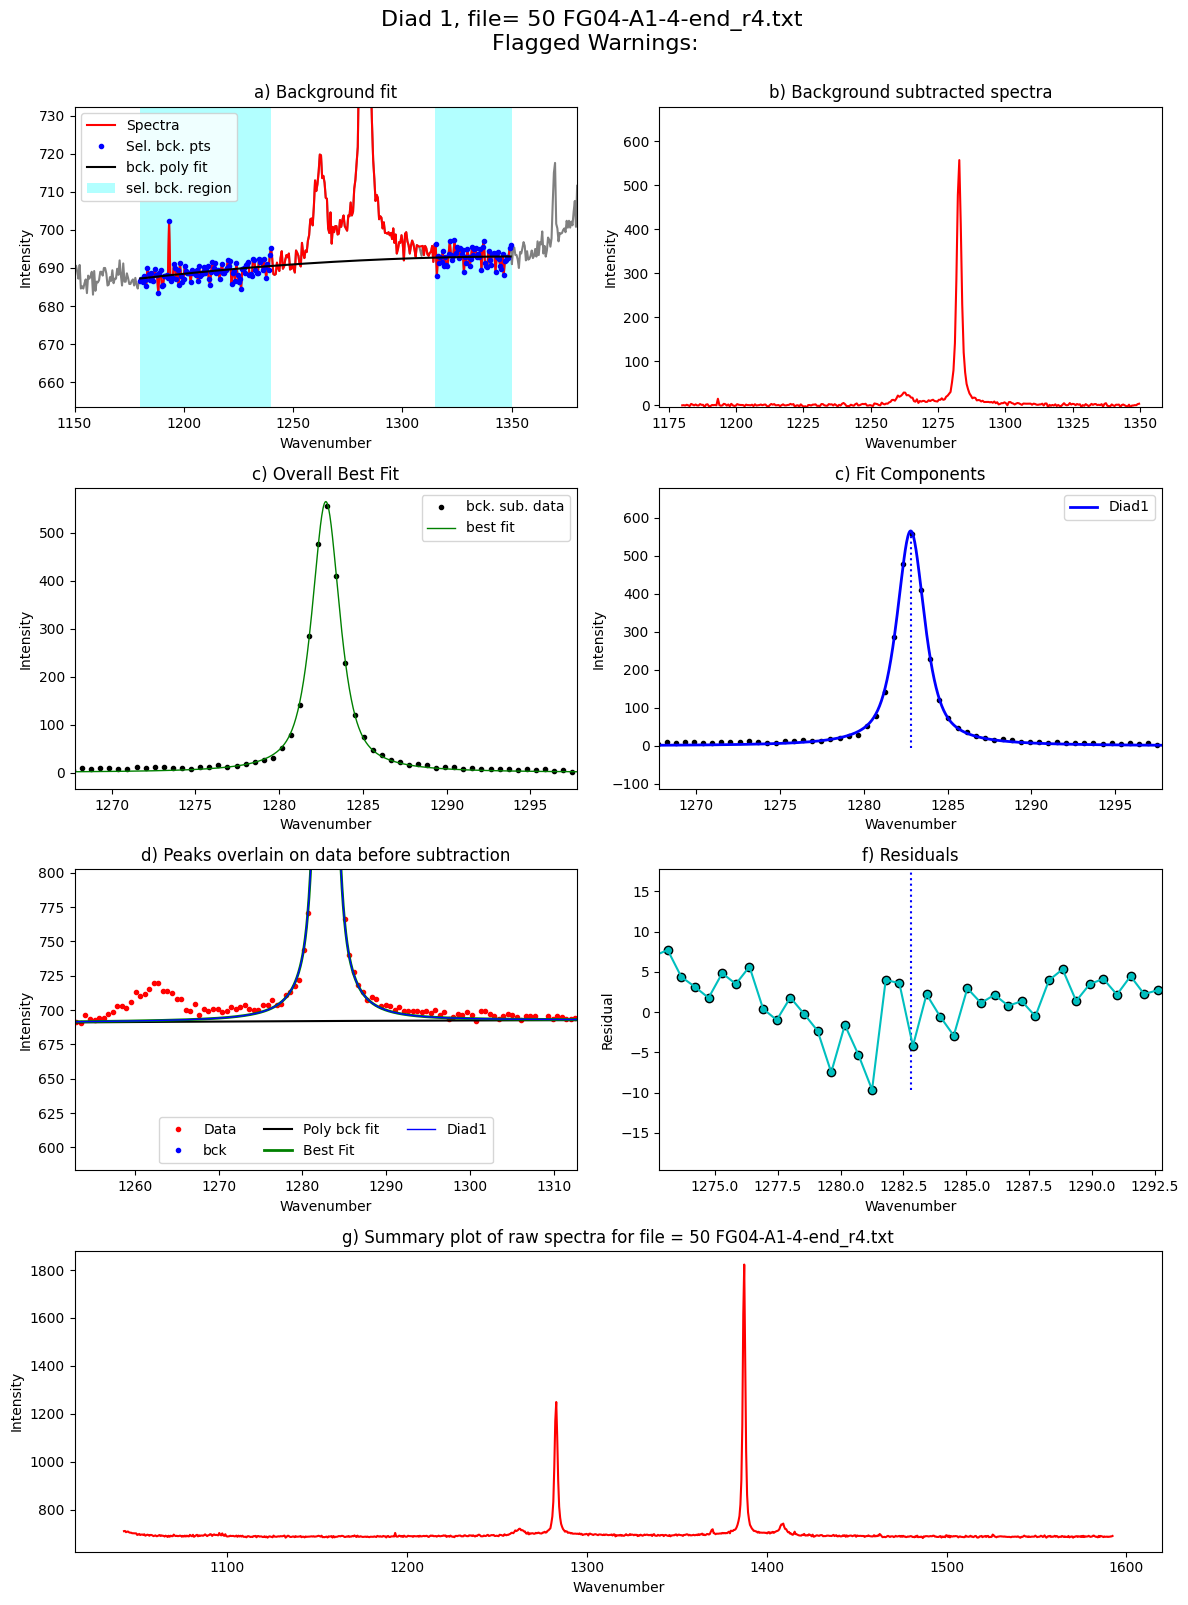

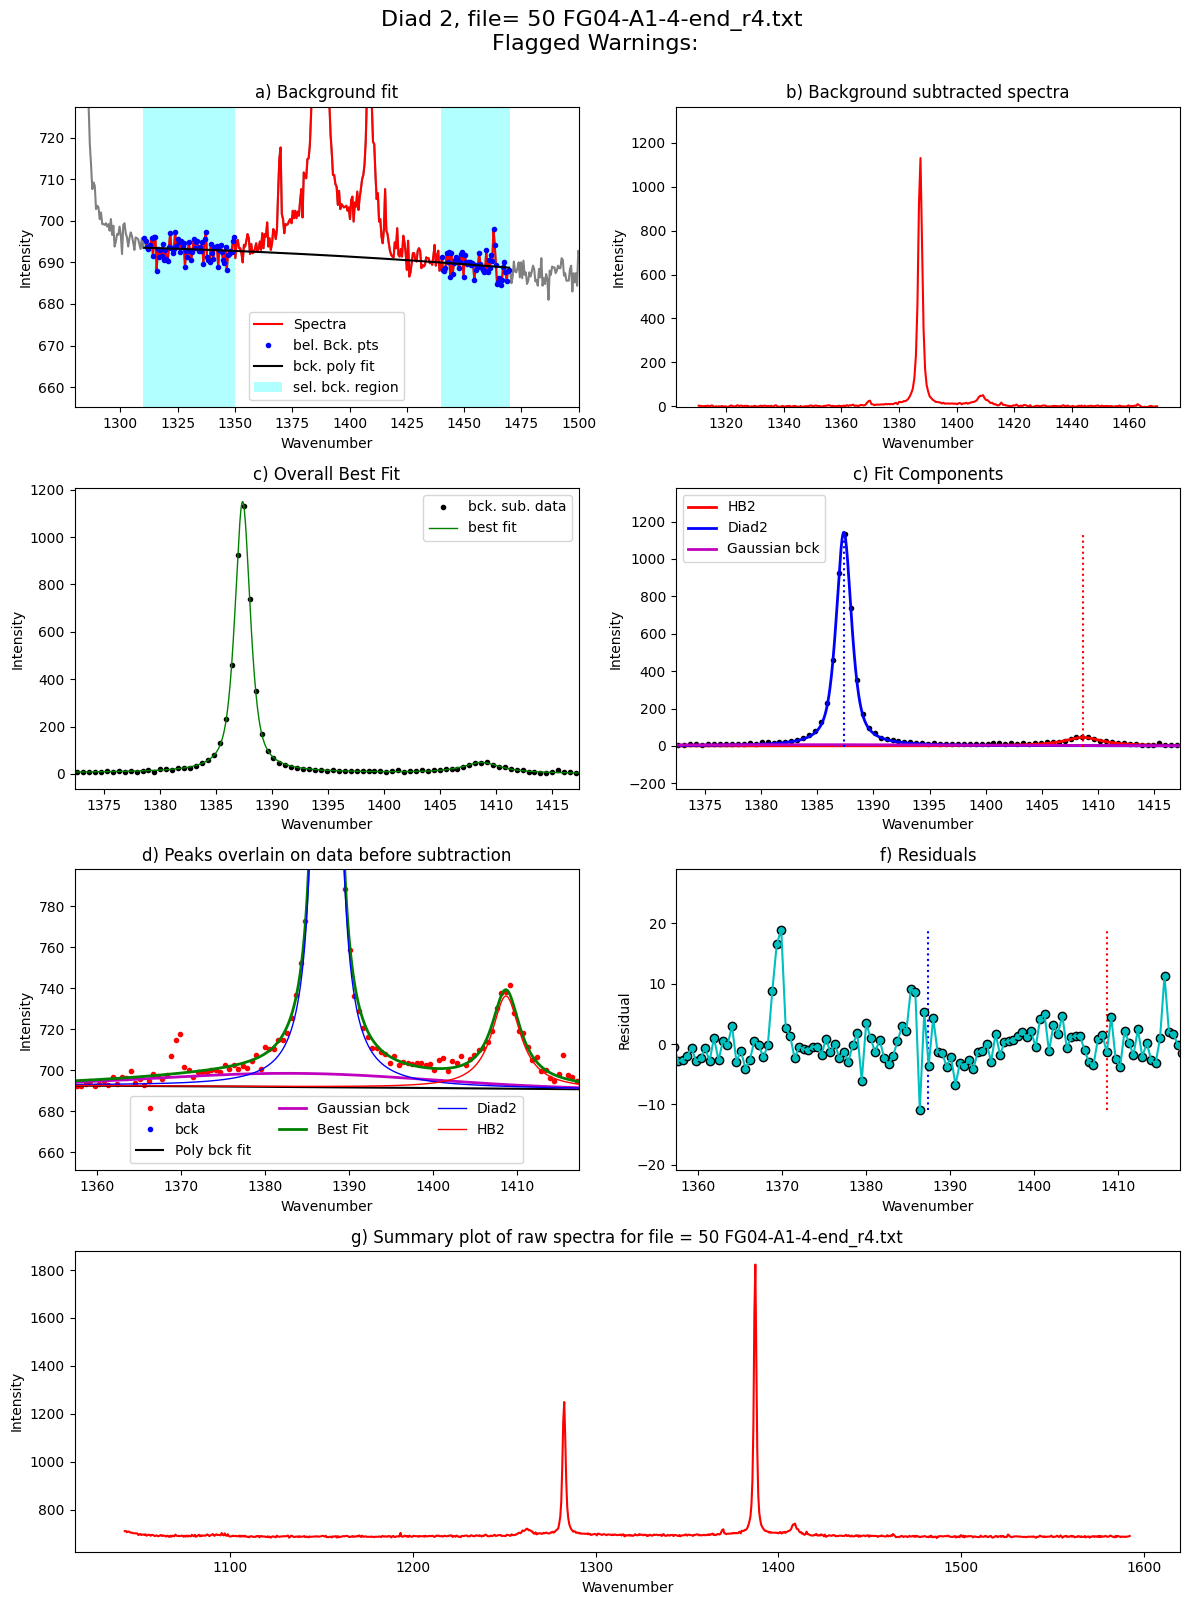

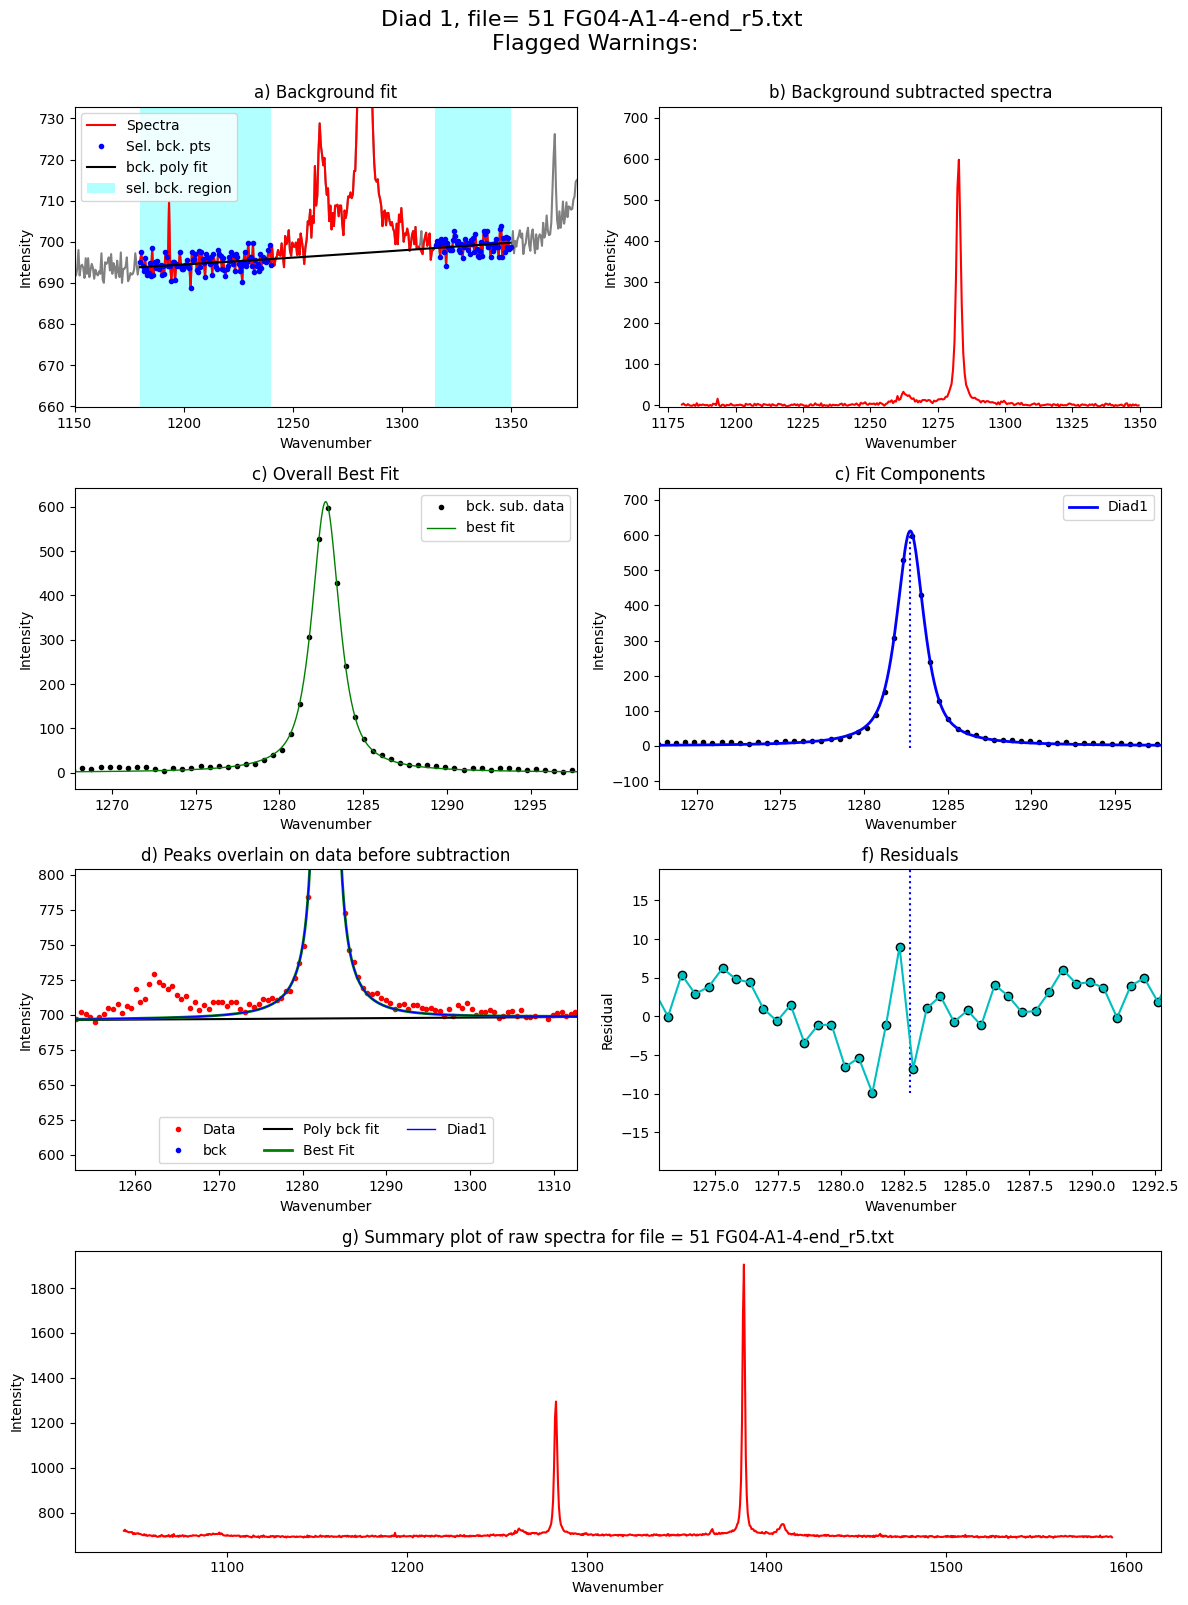

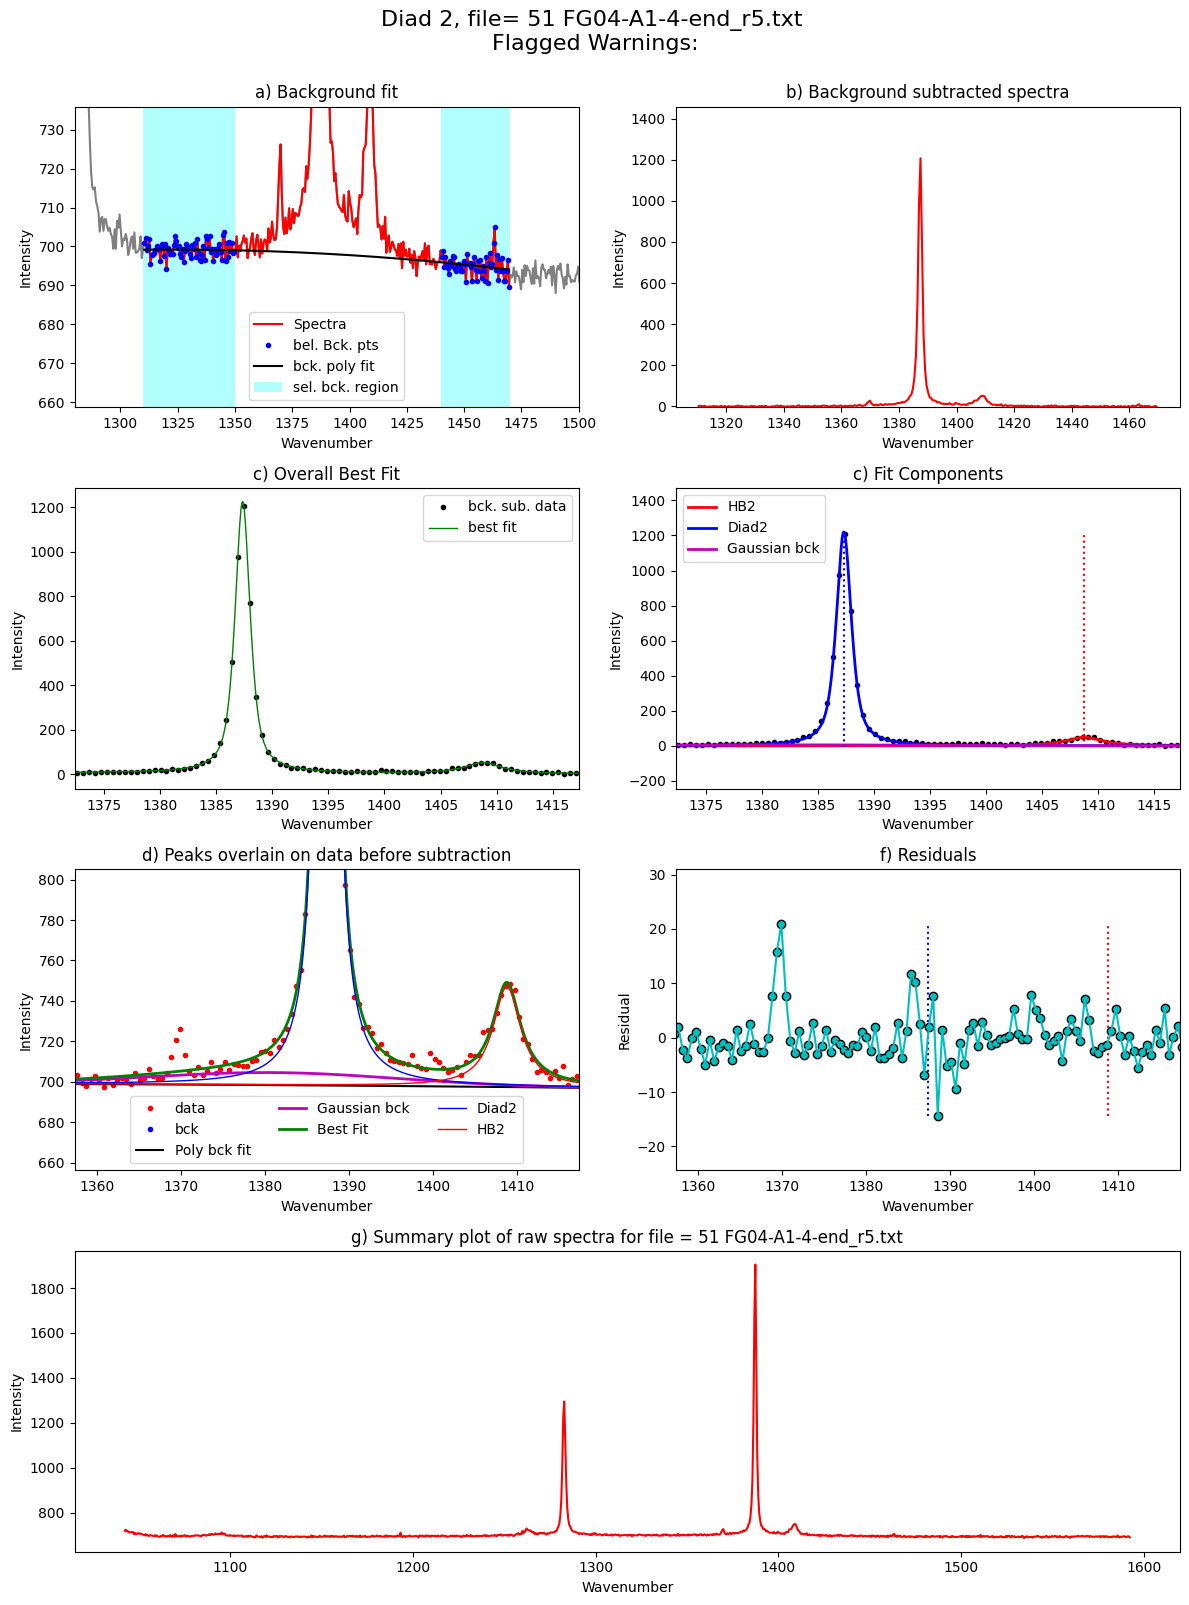

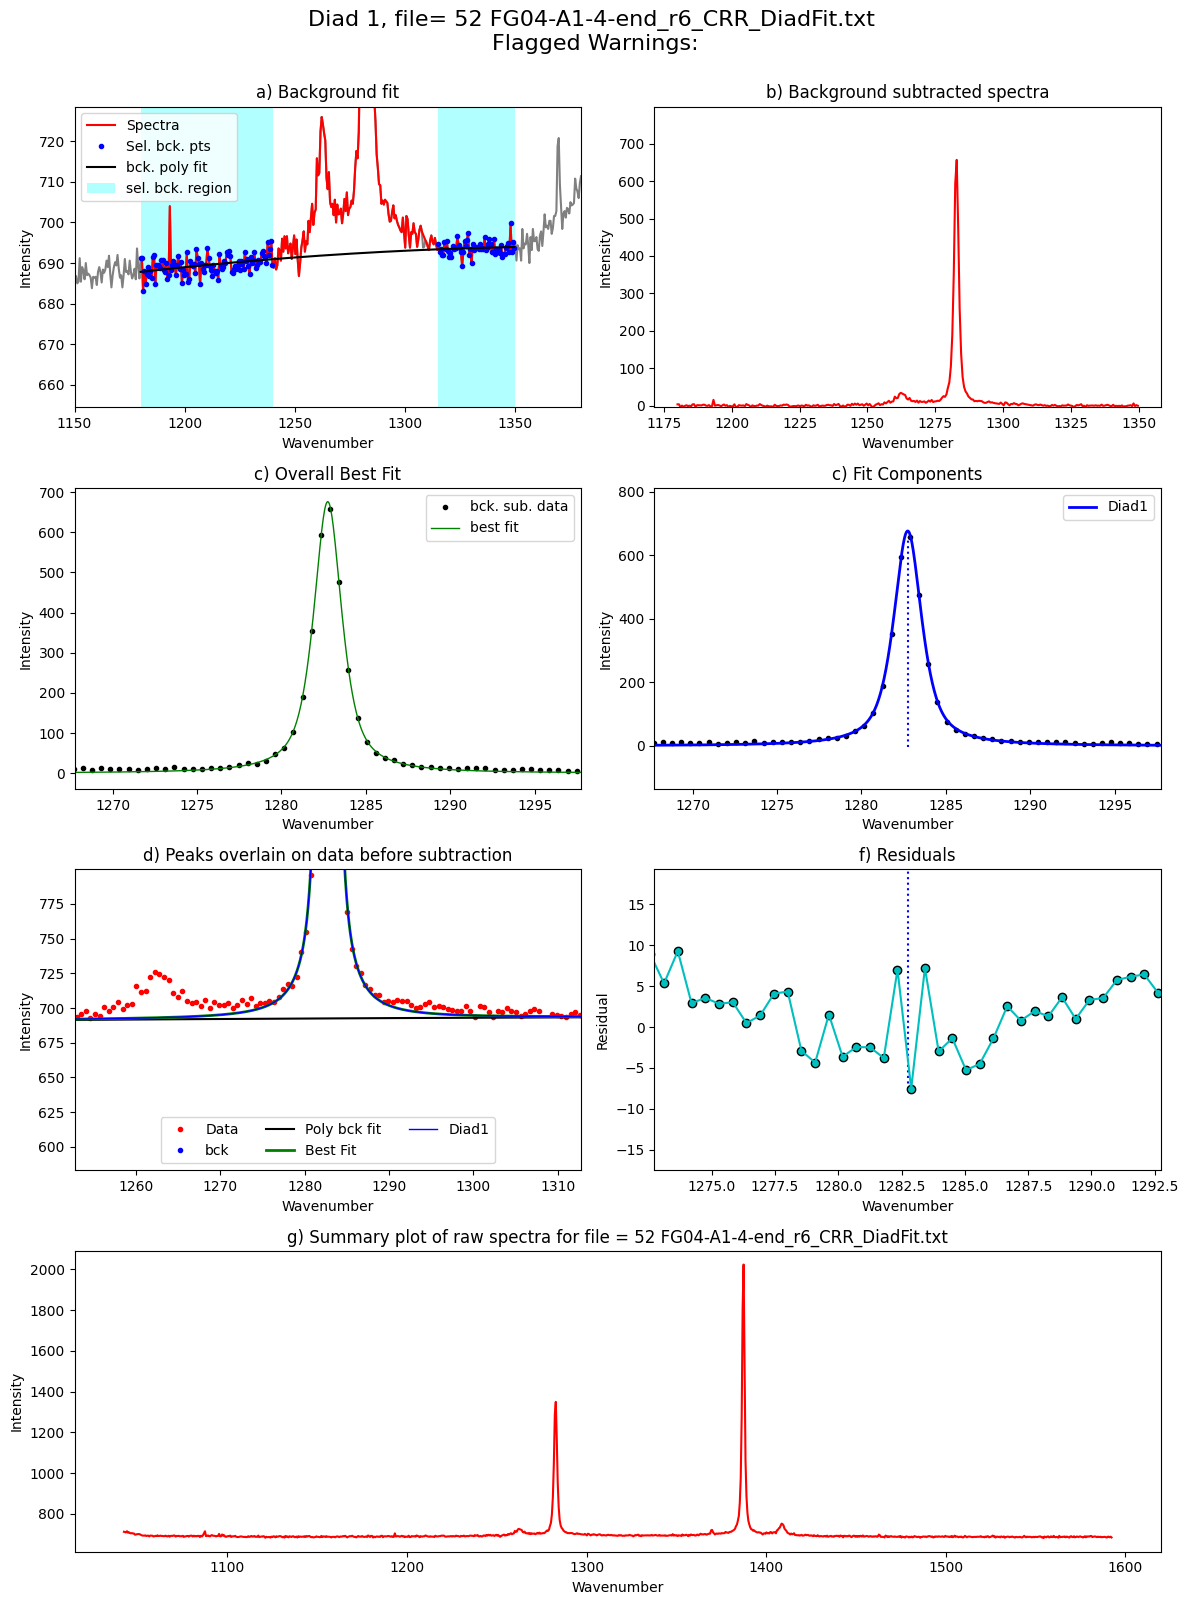

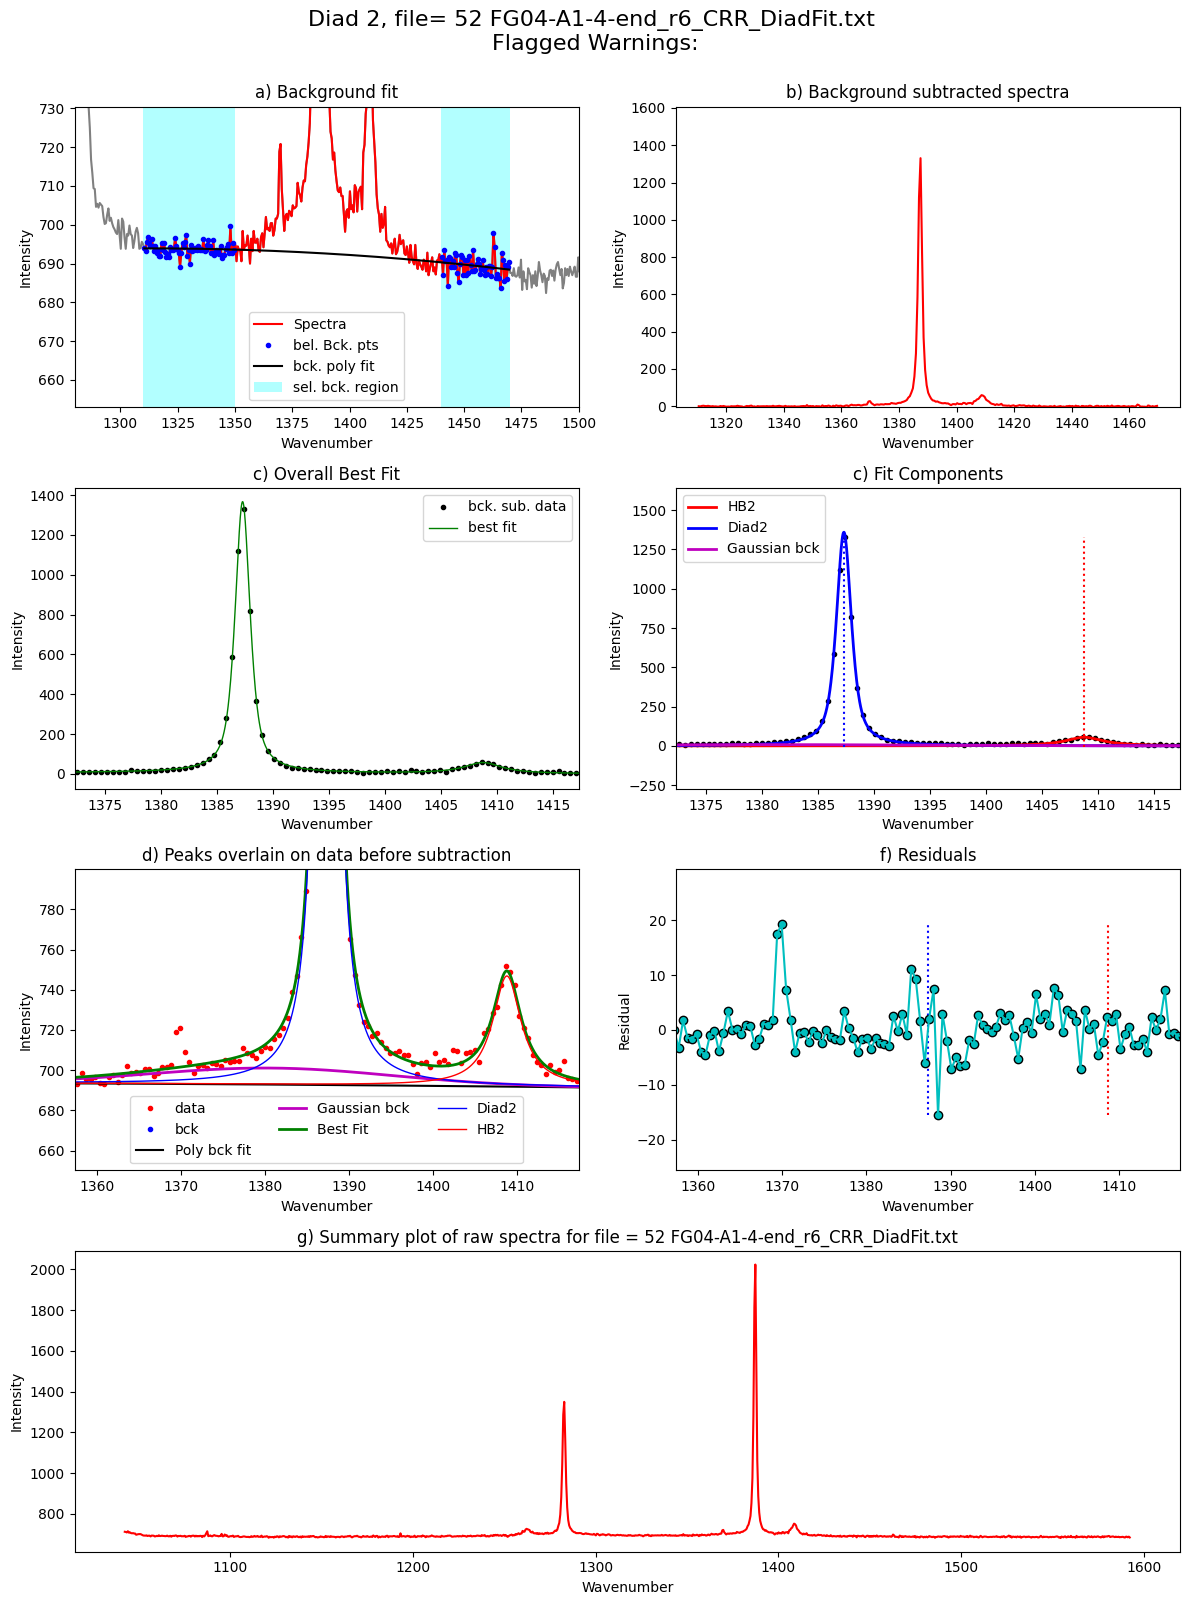

In [47]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [48]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)
if batch=='Std':
    combo.to_excel('Std_Diads.xlsx', index=False)

In [49]:
combo

filename   Splitting   Split_σ  Diad1_Combofit_Cent  \
0            FG04-A1-4-start_r1  104.534724  0.008506          1282.857150   
1            FG04-A1-4-start_r2  104.565474  0.006391          1282.768016   
2            FG04-A1-4-start_r3  104.551684  0.007170          1282.820043   
3              FG04-A1-4-end_r4  104.562430  0.007465          1282.790742   
4              FG04-A1-4-end_r5  104.574885  0.007081          1282.765777   
5  FG04-A1-4-end_r6_CRR_DiadFit  104.567110  0.007114          1282.742209   

   Diad1_cent_err  Diad1_Combofit_Height  Diad1_Voigt_Cent  Diad1_Voigt_Area  \
0        0.008193             435.999292       1282.857150       1261.685044   
1        0.006083             479.995968       1282.768016       1341.774804   
2        0.006785             472.749346       1282.820043       1297.963676   
3        0.007223             565.383892       1282.790742       1609.631593   
4        0.006825             611.827740       1282.765777       1727.694206   
5        0.006914             676.164517       1282.742209       1930.099438   

   Diad1_Voigt_Sigma  Diad1_Residual  ...  Diad1_Asym50  Diad1_Asym70  \
0           0.998156        4.026971  ...      1.032479      1.007092   
1           0.968139        3.941742  ...      1.003472      1.008464   
2           0.953548        3.529815  ...      1.054348      1.068790   
3           0.990495        4.723660  ...      1.032479      1.002398   
4           0.975959        4.889806  ...      1.026042      1.041872   
5           0.994585        5.600431  ...      1.025641      1.001182   

  Diad1_Yuan2017_sym_factor  Diad1_Remigi2021_BSF  Diad2_Asym50  Diad2_Asym70  \
0                  0.064838              0.004579      1.030801      1.033675   
1                  0.006723              0.004034      1.054507      1.039416   
2                  0.103647              0.004034      1.070513      1.084356   
3                  0.064340              0.003504      1.039666      1.021866   
4                  0.050831              0.003190      1.106987      1.096478   
5                  0.051004              0.002942      1.106987      1.094801   

   Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF   Diad1_PDF_Model  \
0                   0.050641              0.001866  PseudoVoigtModel   
1                   0.089225              0.001747  PseudoVoigtModel   
2                   0.113670              0.001730  PseudoVoigtModel   
3                   0.064764              0.001420  PseudoVoigtModel   
4                   0.171931              0.001310  PseudoVoigtModel   
5                   0.171293              0.001171  PseudoVoigtModel   

    Diad2_PDF_Model  
0  PseudoVoigtModel  
1  PseudoVoigtModel  
2  PseudoVoigtModel  
3  PseudoVoigtModel  
4  PseudoVoigtModel  
5  PseudoVoigtModel  

[6 rows x 49 columns]

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [50]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step3 Fit All")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3 Fitall is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()